In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
# 2. Generate synthetic stock price data (random walk model)
np.random.seed(42)  # For reproducibility
n_days = 100  # Number of days to simulate

In [5]:
# Start with an initial stock price
initial_price = 100  

In [7]:
# Simulate daily stock price changes (normally distributed random changes)
daily_returns = np.random.normal(0, 1, n_days)

In [9]:
# Calculate stock prices by cumulatively summing the daily returns
stock_prices = initial_price + np.cumsum(daily_returns)

In [11]:
# Create a DataFrame to hold the stock prices
stock_data = pd.DataFrame({'Day': range(1, n_days + 1), 'Close': stock_prices})

In [13]:
# 3. Prepare the data for linear regression
# Predict the next day's stock price using the current day's price
stock_data['Prediction'] = stock_data['Close'].shift(-1)
stock_data.dropna(inplace=True)  # Remove the last row which has NaN

In [15]:
X = stock_data[['Close']]  # Feature: Today's stock price
y = stock_data['Prediction']  # Target: Next day's stock price

In [17]:
# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# 5. Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# 6. Make predictions on the test set
predictions = model.predict(X_test)

In [23]:
# 7. Compare the predictions with actual values
comparison = pd.DataFrame({'Predicted': predictions, 'Actual': y_test})
print(comparison.head())

    Predicted     Actual
62  88.961701  87.753344
40  91.973963  92.164361
95  89.296333  89.583767
18  97.905899  96.574029
97  89.847800  89.849935


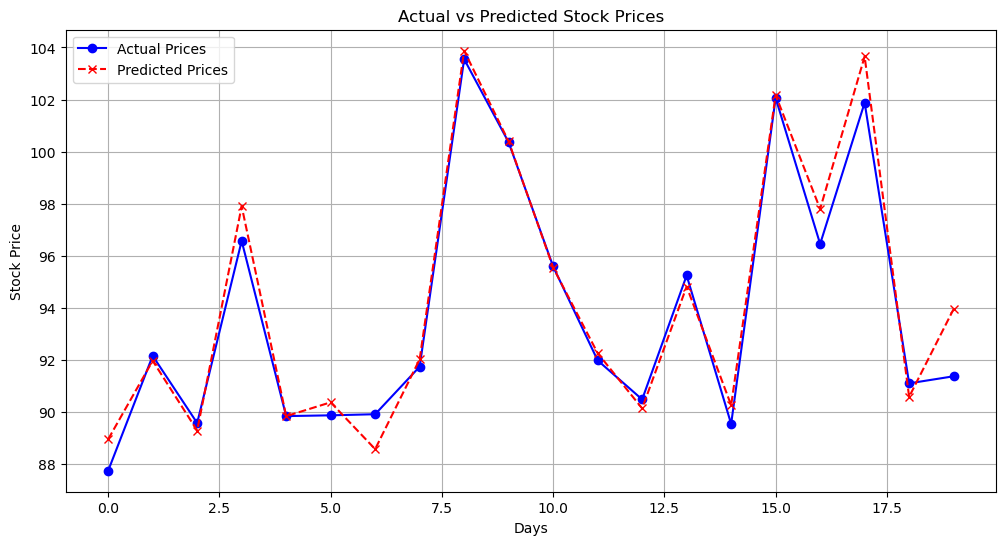

In [25]:
# 8. Plotting the results (Predicted vs Actual)
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Prices', color='blue', marker='o')
plt.plot(predictions, label='Predicted Prices', color='red', linestyle='--', marker='x')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

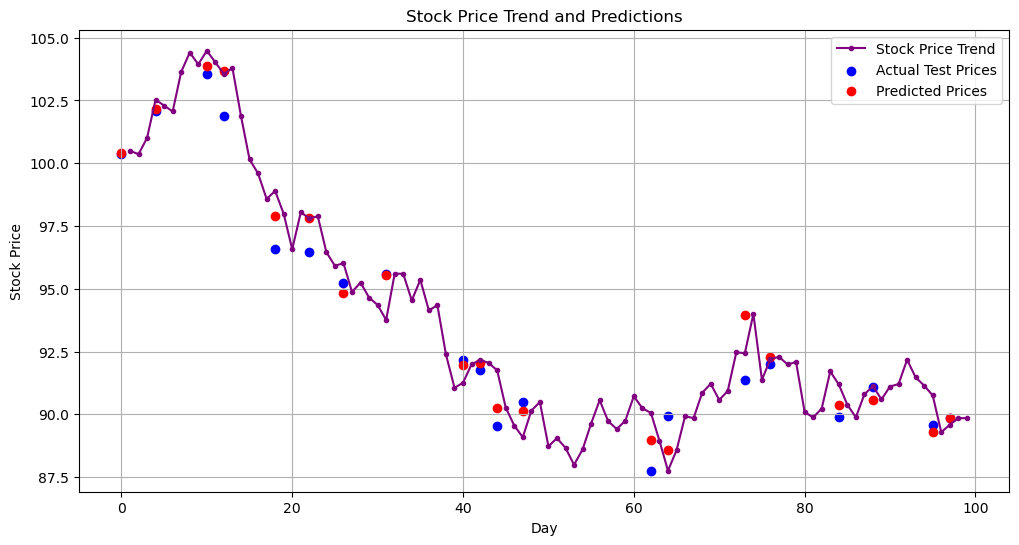

In [27]:
# 9. Creative Visualization: Simulate actual stock price trend and predictions on top
plt.figure(figsize=(12,6))
plt.plot(stock_data['Day'], stock_data['Close'], label='Stock Price Trend', color='purple', marker='.')
plt.scatter(X_test.index, y_test, label='Actual Test Prices', color='blue')
plt.scatter(X_test.index, predictions, label='Predicted Prices', color='red')
plt.title('Stock Price Trend and Predictions')
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# 10. Import accuracy metrics from scikit-learn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [31]:

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-Squared (R²)
r2 = r2_score(y_test, predictions)

In [33]:
# Print the accuracy results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-Squared (R²): {r2}')

Mean Absolute Error (MAE): 0.6814541685893026
Mean Squared Error (MSE): 0.9184162467768242
Root Mean Squared Error (RMSE): 0.9583403606114188
R-Squared (R²): 0.9586573799415565
